# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# untuk encoding, normalisasi, preprocessor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
# untuk oversampling
from imblearn.over_sampling import SMOTE
# untuk split dataset jadi train dan test
from sklearn.model_selection import train_test_split
# untuk model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# UNTUK EVALUASI
from sklearn.metrics import accuracy_score
# UNTUK TUNING HYPERPARAMETER
from sklearn.model_selection import GridSearchCV
# UNTUK EVALUASI MODEL KLASIFIKASI
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

# Load Data

**Sumber data**: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
stroke_df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [ ]:
# periksa ringkasan informasi dataset
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# tampilkan jumlah missing values
print("Missing Value:\n")
stroke_df.isnull().sum()[stroke_df.isnull().sum() > 0]

Missing Value:



,0
bmi,201


In [ ]:
# periksa duplikasi data
print('Jumlah duplikasi: ', stroke_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# periksa ringkasan statistik dataset
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Insight:**
- stoke_df memiliki 12 kolom dengan 5110 baris data
- Tidak terdeteksi duplikasi data
- Terdeteksi missing value pada kolom bmi sejumlah 201

<br>

**Kolom:**
- Data Kategorikal:
  - gender
  - hypertension
  - heart_disease
  - ever_married
  - work_type
  - Residence_type
  - smoking_status

- Data Numerikal:
  - age
  - avg_glucose_level
  - bmi

- Variabel Target:
  - stroke

- Yang akan dihapus:
  - id (karena tidak digunakan dalam analisis)

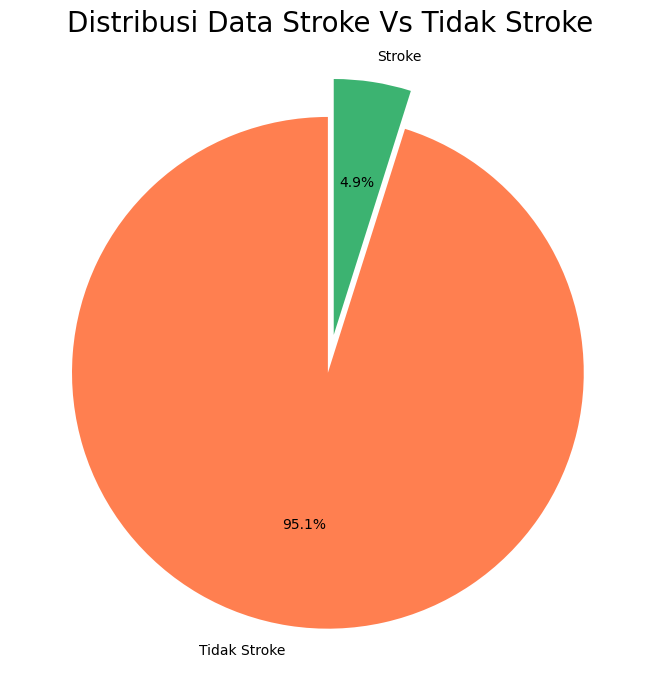

In [ ]:
# ==================================================================
# plot distribusi data pasien stroke vs tidak stroke pakai pie chart
# ==================================================================
colors = ['coral', 'mediumseagreen']
stroke_counts = stroke_df['stroke'].value_counts()
labels = ['Tidak Stroke' if x == 0 else 'Stroke' for x in stroke_counts.index]
sizes = stroke_counts.values
explode = (0.05, 0.1)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribusi Data Stroke Vs Tidak Stroke', fontsize=20)
plt.tight_layout()
plt.show()

**Insight:** <br>
Jumlah data pasien stroke dan tidak stroke sangat tidak seimbang. Perlu tindak lanjut oversampling.

In [ ]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
target_column = 'stroke'

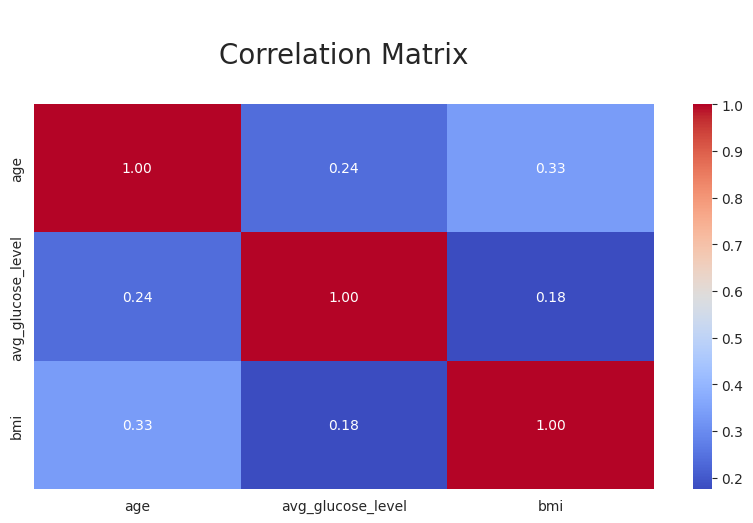

In [ ]:
# ==================================================================
# periksa korelasi antar variabel numerik dengan menggunakan heatmap
# ==================================================================
sns.set_style('darkgrid')
# visualisasi korelasi antar variabel numerik
plt.figure(figsize=(10,5))
correlation_matrix = stroke_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('\nCorrelation Matrix\n', fontsize=20)
plt.show()

**Insight:** <br>
Korelasi antar variabel:
- age dan bmi = 0.33
- age dan avg_glucose_level = 0.24
- avg_glucose_level dan bmi = 0.18

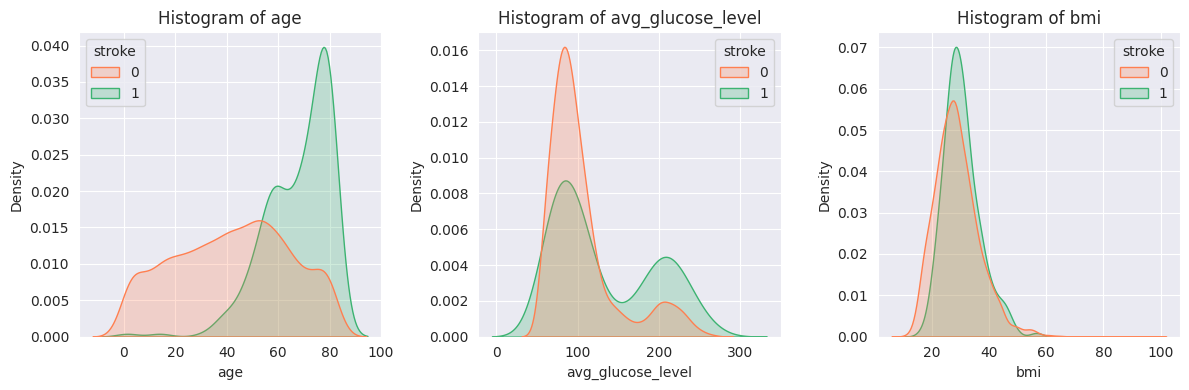

In [ ]:
# ================================================================
# periksa distribusi variabel numerik dengan menggunakan histogram
# ================================================================
# ukuran grid
rows, cols = 1, 3

# figure dan subplots
plt.figure(figsize=(12,4))

# plot setiap fitur ke dalam subplot
for i, col in enumerate(numerical_columns, 1):
  plt.subplot(rows, cols, i)
  # sns.kdeplot(stroke_df[col], hue=stroke_df['stroke'], fill=True)
  sns.kdeplot(data=stroke_df, x=col, hue='stroke', common_norm=False, palette={0: 'coral', 1: 'mediumseagreen'}, fill=True)
  plt.title(f'Histogram of {col}')

# atur layout agar tidak bertumpuk
plt.tight_layout()
plt.show()

**Insight:** <br>

Ada pola menarik nih:
- **Mayoritas pasien stroke ada di rentang usia 60 s.d. 80**, sementara distribusi jumlah orang yang tidak mengidap stroke cenderung merata dari rentang usia 0 sampai 80 tahun.
- Jumlah pasien dengan **rata-rata gula darah 200 didominasi oleh pasien stroke** alih-alih pasien yang tidak stroke.
- Baik pasien stroke maupun non-stroke memiliki distribusi normal pada variabel bmi, dengan **densitas lebih tinggi pada pasien stroke**.

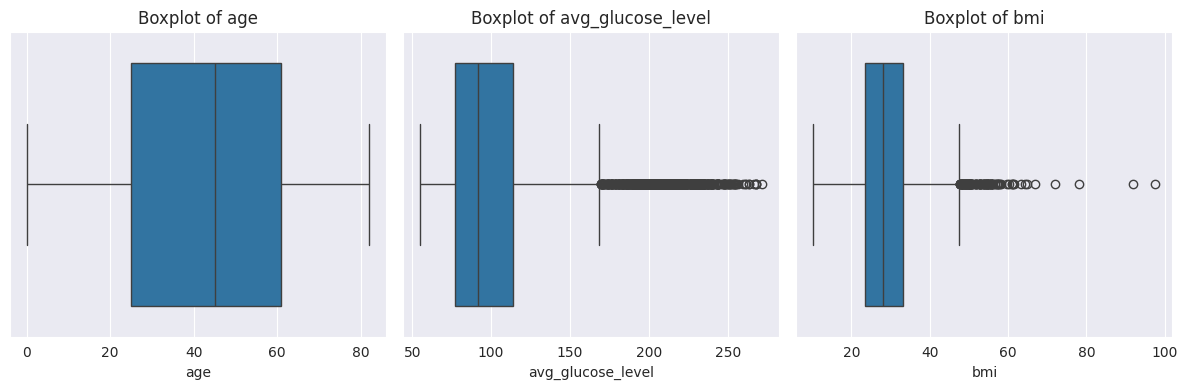

In [ ]:
# ==============================================================
# periksa distribusi variabel numerik dengan menggunakan boxplot
# ==============================================================
# ukuran grid
rows, cols = 1, 3

# figure dan subplots
plt.figure(figsize=(12, 4))

# Plot setiap fitur dalam subplot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=stroke_df[col])
    plt.title(f"Boxplot of {col}")

# Atur layout agar tidak bertumpuk
plt.tight_layout()
plt.show()

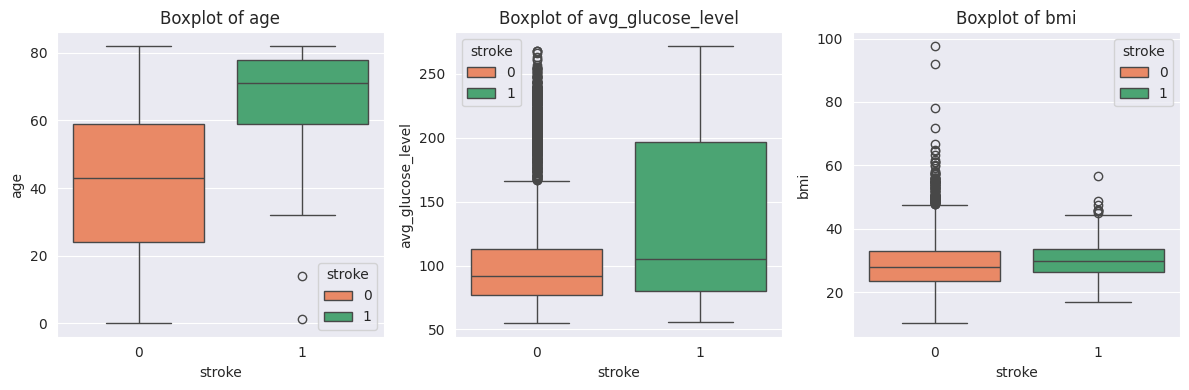

In [ ]:
# ===========================================================================================
# periksa distribusi variabel numerik pasien stroke dan non-stroke dengan menggunakan boxplot
# ===========================================================================================
# ukuran grid
rows, cols = 1, 3

# figure dan subplots
plt.figure(figsize=(12, 4))

# Plot setiap fitur dalam subplot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    # sns.boxplot(x=stroke_df[col])
    sns.boxplot(x='stroke', y=col, data=stroke_df, hue='stroke', palette={0: 'coral', 1: 'mediumseagreen'})
    plt.title(f"Boxplot of {col}")

# Atur layout agar tidak bertumpuk
plt.tight_layout()
plt.show()

**Insight:** <br>
Berdasarkan boxplot di atas, dapat dilihat bahwa avg_glucose_level pasien stroke lumayan lebih tinggi dibanding non-stroke.

Di saat yang bersamaan, karena data pasien stroke dan non-stroke tidak seimbang, maka outlier avg_glucose_level yang ada pada pasien non-stroke kemungkinan besar disebabkan oleh kedua hal tersebut.

Artinya, **outlier avg_glucose_level pada pasien non-stroke bisa jadi bukan merupakan noise**. Jadi jangan langsung dihapus outlier-nya.

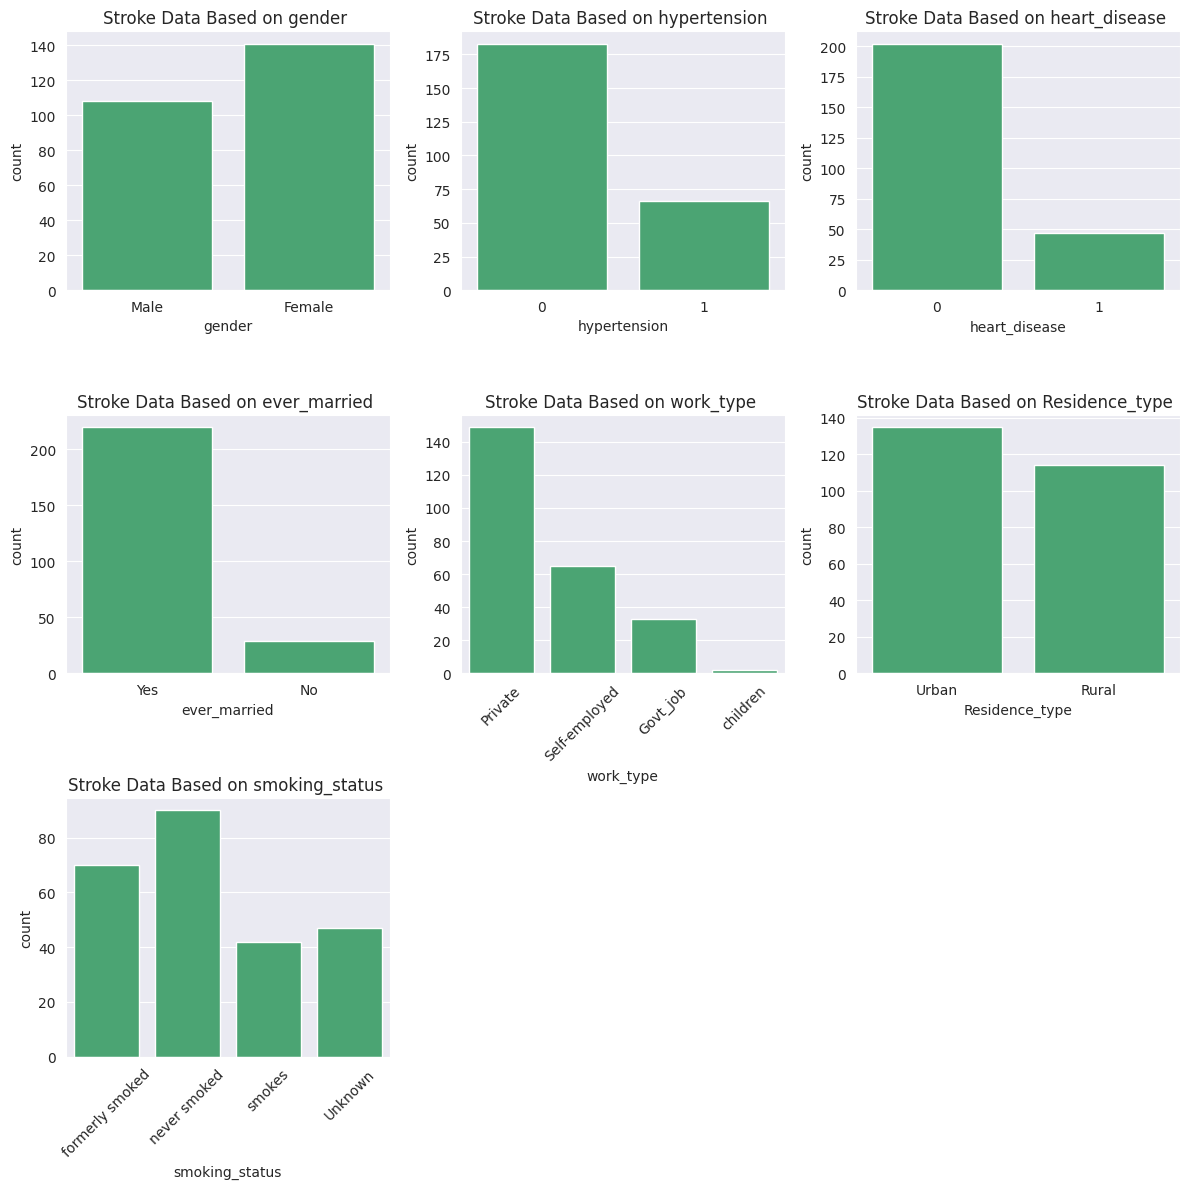

In [ ]:
# ================================================================================
# periksa distribusi variabel kategorikal data stroke dengan menggunakan countplot
# ================================================================================
# ukuran grid
rows, cols = 3, 3

# figure dan subplots
plt.figure(figsize=(12, 12))

# Plot setiap fitur dalam subplot
for i, col in enumerate(categorical_columns, 1):
  plt.subplot(rows, cols, i)
  sns.countplot(data=stroke_df[stroke_df['stroke'] == 1], x=col, color='mediumseagreen')
  if col == 'work_type' or col == 'smoking_status':
    plt.xticks(rotation=45)  # miring 45 derajat
  plt.title(f"Stroke Data Based on {col} ")

# Atur layout agar tidak bertumpuk
plt.tight_layout()
plt.show()

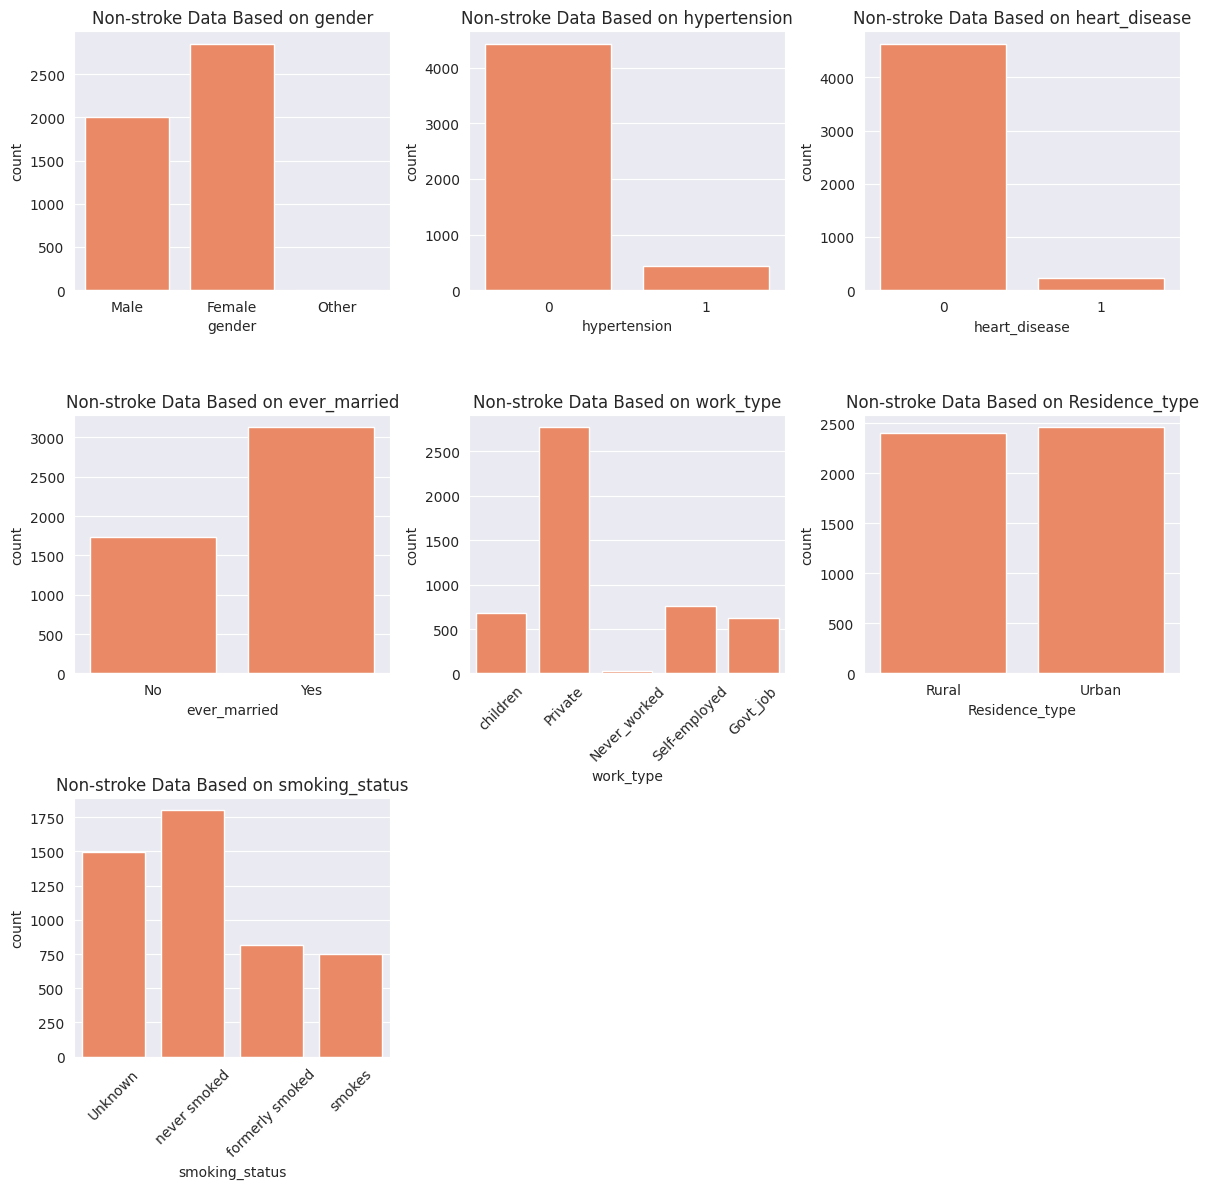

In [ ]:
# ====================================================================================
# periksa distribusi variabel kategorikal data non stroke dengan menggunakan countplot
# ====================================================================================
# ukuran grid
rows, cols = 3, 3

# figure dan subplots
plt.figure(figsize=(12, 12))

# Plot setiap fitur dalam subplot
for i, col in enumerate(categorical_columns, 1):
  plt.subplot(rows, cols, i)
  sns.countplot(data=stroke_df[stroke_df['stroke'] == 0], x=col, color='coral')
  if col == 'work_type' or col == 'smoking_status':
    plt.xticks(rotation=45)  # miring 45 derajat
  plt.title(f"Non-stroke Data Based on {col}")

# Atur layout agar tidak bertumpuk
plt.tight_layout()
plt.show()

**Insight:** <br>
- **gender**:
baik stroke maupun non-stroke, jumlah female nya sedikit lebih tinggi dari male

- **hypertension**: kalau yang stroke, juumlah yang ga hipertensi lebih banyak dari yang hipertensi, tapi perbandingannya lebih tinggi daripada non-stroke

- **heart_disease**: ini sama kayak hypertension case nya

- **ever_married**: kalau yang stroke mayoritas sudah menikah, di mana proporsinya lebih tinggi daripada non-stroke. kalau yang non-stroke, itu memang mayoritas sudah menikah juga, tapi jumlah pasien non-stroke yang belum menikah lumayan lebih besar proporsinya kalau dibandingkan sama yang pasien stroke yang belum menikah

- **work_type**: yang paling mencolok di sini yang children. pasien non-stroke lumayan banyak yang anak-anak, sementara kalau yang stroke sangat sedikit. Selain itu, ga ada pasien stroke yang belum pernah bekerja (Never_worked)

- **residence_type**: baik pasien stroke maupun non stroke sama-sama lebih banyak berdomisili urban. tapi kalau pasien stroke itu proporsi urbannya lebih tinggi perbandingannya dengan rural dibanding non-stroke. kalau non-stroke lebih rata.

- **smoking_status**: baik pasien stroke maupun non-stroke, mayoritas memang tidak pernah merokok. tapi ada pola yang berbeda di mayoritas kedua. pasien stroke yang pernah merokok (formerly smoked) ada di mayoritas kedua. ini pola yang berbeda dari orang non-stroke, di mana yang pernah merokok justru ada di urutan mayoritas ketiga.

# Data Preparation

Berdasarkan hasil EDA yang telah dilakukan sebelumnya, berikut urutan tindakan preprocessing yang harus dilakukan: <br>
1. Drop kolom yang tidak diperlukan (id)
2. Hapus missing value
3. Bangun preprocessor yang isinya encoding dan normalisasi
4. Data Splitting dan terapkan preprocessor yang sudah dibangun di tahap 3

**1. DROP KOLOM YANG TIDAK DIPERLUKAN**

In [ ]:
# drop id
stroke_df = stroke_df.drop(['id'], axis=1)

# periksa stroke_df terbaru
stroke_df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


**2. HAPUS MISSING VALUE**

In [ ]:
# hapus missing value
stroke_df = stroke_df.dropna()

# periksa masih ada missing value atau ngga
stroke_df['bmi'].isnull().sum()

np.int64(0)

**3. BANGUN PREPROCESSOR**

Pakai robustscaler soalnya ada dua kolom numerik yang punya banyak banget outlier (avg_glucose_level dan bmi), terus juga ngga semuanya berdistribusi normal, ada yang bimodal juga (punya 2 puncak).

In [ ]:
preprocessor = ColumnTransformer(transformers=[
  ('num', RobustScaler(), numerical_columns), # scale kolom numerik
  ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns) # encode kolom kategorikal
])

In [ ]:
# untuk oversampling, pakai smote
smote = SMOTE(random_state=0)

**4. DATA SPLITTING**

Bagi dataset ke train dan test set. Lalu terapkan preprocess dan oversampling pada train set, dan terapkan preprocess tanpa oversampling pada test set, sebab data test tidak boleh dimodifikasi.

In [ ]:
# pisahkan dataset fitur dan target
X = stroke_df.drop(['stroke'], axis=1) # dataset fitur
y = stroke_df['stroke'] # data target

# bagi dataset ke train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
# ket: pakai stratify=y supaya dataset seragam antara train dan test set berdasarkan target nya

# preprocessing dan oversampling data train
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# preprocessing data test (tanpa oversampling, soalnya data test tidak boleh dimodifikasi)
X_test_preprocessed = preprocessor.transform(X_test)

# Modeling

Pada tahap ini, akan dilatih model untuk klasifikasi pasien stroke dan non-stroke. Adapun algoritma machine learning yang digunakan tertera sebagai berikut:
- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbors
- Support Vector Machine
- Naive Bayes

In [ ]:
lr = LogisticRegression(random_state=0).fit(X_train_resampled, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_resampled, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_resampled, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_resampled, y_train_resampled)
svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_resampled, y_train_resampled)

print("Model selesai dilatih.")

Model selesai dilatih.


# Model Evaluation

**1. EVALUASI METRIK MASING-MASING MODEL**

Sekarang kita bandingkan hasil evaluasi metrik dari masing-masing model yang sudah dilatih sebelumnya.

In [ ]:
# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_preprocessed, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_preprocessed, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_preprocessed, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_preprocessed, y_test),
  'Support Vector Machine (svm)': evaluate_model(svm, X_test_preprocessed, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_preprocessed, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Evaluasi model klasifikasi:

                          Model  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression (lr)  0.741042   0.113372  0.750000  0.196970
1            Decision Tree (dt)  0.894951   0.118812  0.230769  0.156863
2            Random Forest (rf)  0.929153   0.093023  0.076923  0.084211
3     K-Nearest Neighbors (knn)  0.827362   0.087629  0.326923  0.138211
4  Support Vector Machine (svm)  0.823290   0.123288  0.519231  0.199262
5              Naive Bayes (nb)  0.286645   0.056034  1.000000  0.106122


**2. VISUALISASI EVALUASI DENGAN CONFUSION MATRIX**

Untuk mempermudah interpretasi evaluasi model, akan digunakan visualisasi confusion matrix dengan kode sebagai berikut.

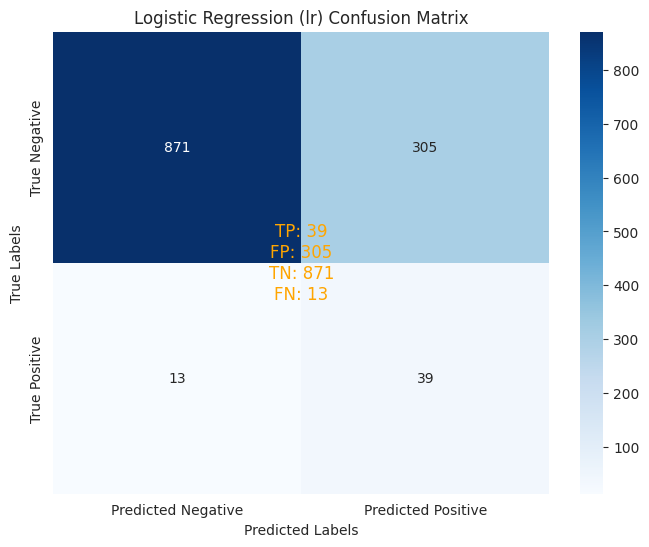

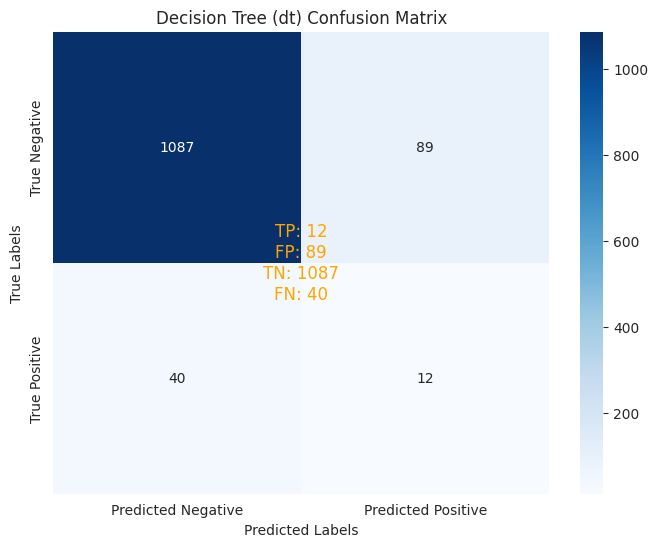

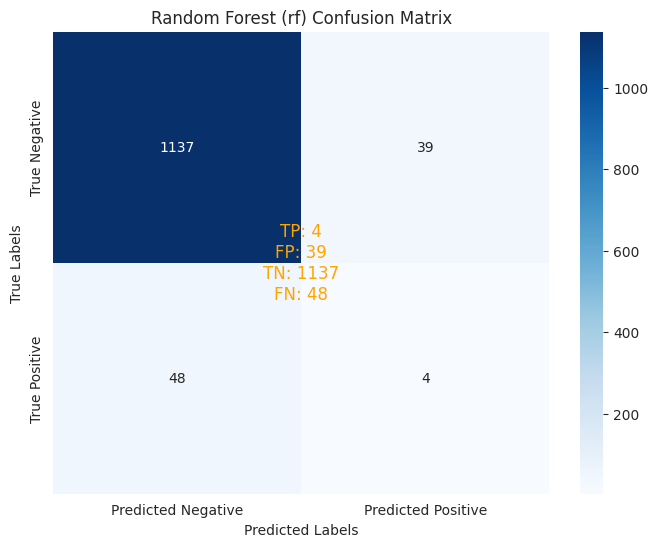

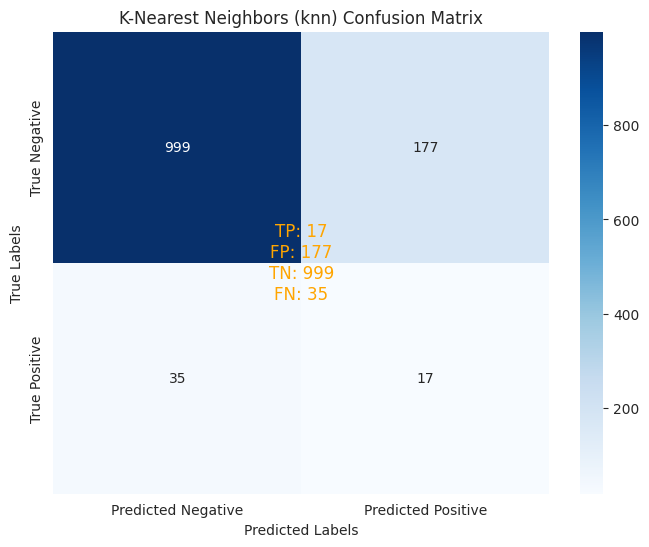

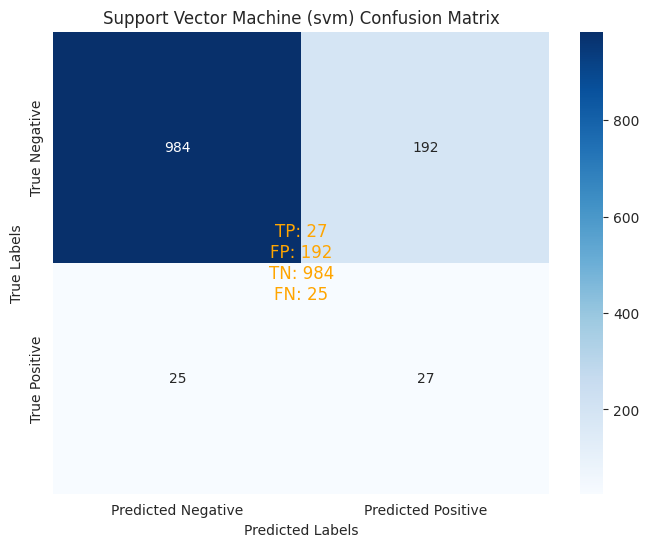

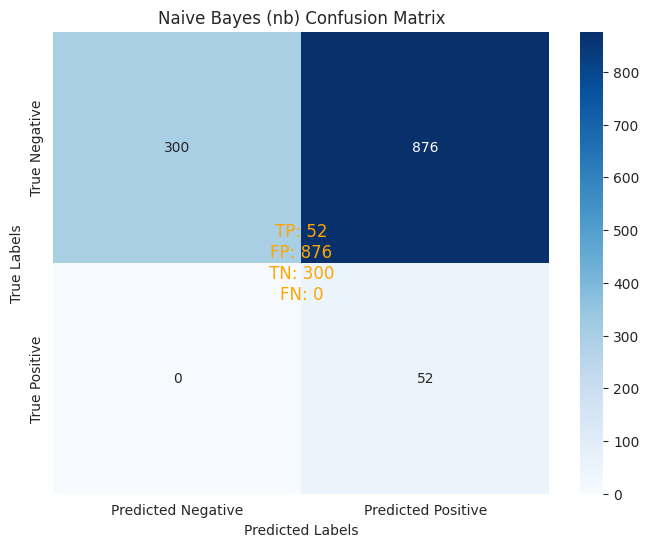

In [ ]:
# iterasi untuk setiap model
for model_name, metric in evaluasi_model.items():
    cm = metric['Confusion Matrix']

    # definisikan TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()  # misalnya cm adalah array 2x2

    # plot confusion matrix dengan seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['True Negative', 'True Positive'])

    # tambahkan label tambahan (False Positive, False Negative, dkk.)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'{model_name} Confusion Matrix')

    # tampilkam label untuk setiap elemen
    plt.text(0.5, 0.5, f'TP: {tp}\nFP: {fp}\nTN: {tn}\nFN: {fn}',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=12, color='orange')

    # tampilkan confusion matrix
    plt.show()

**Insight:** <br>
Model yang paling aman untuk deteksi stroke berurutan dari teraman hingga terawan berdasarkan confusion matrix di atas ialah:
- 🥇 **Naive Bayes (nb)** <br>
recall-nya sempurna, jadi hampir dapat dipastikan tidak akan ada pasien stroke yang terlewat terdeteksi. Tapi akurasinya sangat rendah, yang artinya bakal banyak pasien yang dicurigai stroke padahal sebenarnya tidak stroke (false positive). Tapi memang dari segi keamanan (tidak ada false negative), sehingga naive bayes yang paling aman untuk kasus ini.
- 🥈 **Logistic Regression (lr)** <br>
kalau ini recall-nya cukup tinggi (0.75), dan f1-score-nya juga paling tinggi dibanding model lainnya (0.19). Kalau precision, masih tergolong kecil, tapi kalau dari segi keseimbangan, ini lumayan oke kalau dibanding naive bayes.
- 🥉 **SVM (svm)** <br>
ini recall-nya lumayan (0.51), dengan precision yang lebih tinggi daripada lr dan nb. Bisa dijadikan alternatif.
- **4. K-Nearest Neighbors (knn)** <br>
start dari urutan ke-4, recall-nya udah tergolong rendah. Untuk KNN sendiri, recall-nya masih lebih tinggi dari 2 model dengan recall terendah lainnya, tapi di sisi yang bersamaan, precision-nya rendah.
- **5. Decision Tree (dt)** <br>
yang ini accuracy-nya tinggi (0.89), tapi recall-nya rendah, yang artinya bakal banyak kasus stroke yang ga bakal terdeteksi, padahal pada kenyataannya adalah stroke (false negative nya tinggi). Ibaratnya, model ini ntar bakal sering nganggep seseorang itu sehat, padahal sebenarnya orang itu stroke. Kan bahaya.
- **6. Random Forest (rf)** <br>
ini model yang hasil metrik recall nya paling rendah dibanding semuanya. Paling berbahaya untuk digunakan dalam kasus klasifikasi stroke ini.

# Conclusion

**Rekomendasi:** <br>
Gunakan model dengan algoritma **Logistic Regression**. <br>
Alasan:
- recall tinggi, yang artinya jumlah false negative rendah
- punya f1-score tertinggi di antara semua model, yang artinya lr punya keseimbangan terbaik antara recall dan precision
- simpel dan interpretable, yang artinya mudah dijelaskan ke dokter atau pihak non-teknis. Nanti si koefisiennya bisa diinterpretasikan sebagai "tingkat pengaruh" dari setiap fitur ke risiko stroke

Kenapa bukan Naive Bayes yang direkomendasikan? <br>
Alasannya:
- akurasi totalnya rendah
- precision sangat rendah (5%), yang artinya dari 100 kasus yang diprediksi "positif stroke", cuma 5 yang benar-benar stroke. Ini bisa bikin sistem kehilangan kepercayaan pasien, dan bisa berpotensi overtreatment ke pasien. Jadi walau memang false negative itu lebih bahaya, tapi kalau terlalu banyak false positive jatuhnya bukan solusi yang ideal juga.
